首先， 我们要了解一下什么是哑变量（ Dummy Variables ）。哑变量， 也被称为虚拟变量，
是一种在统计学和经济学领域非常常用的， 用来把某些类型变量转化为二值变量的方法，
在回归分析中的使用尤其广泛。在第6 章中，我们就是使用了pandas 的get_dummies 将
adult 数据集中的类型特征转换成了用0 和l 表达的数值特征。

哑变量，dummy variables

In [1]:
#导入pandas
import pandas as pd
#手工输入←个数据表
fruits = pd.DataFrame({"数值特征": [5,6,7,8,9],
"类型特征": ["西瓜","香蕉", "椅子","苹果","葡萄"]})
display(fruits)

,数值特征,类型特征
0,5,西瓜
1,6,香蕉
2,7,椅子
3,8,苹果
4,9,葡萄


把里面的类型特征要转化成数值特征，用到get_dummy

In [2]:
fru_dum=pd.get_dummies(fruits)
fru_dum

,数值特征,类型特征_椅子,类型特征_苹果,类型特征_葡萄,类型特征_西瓜,类型特征_香蕉
0,5,0,0,0,1,0
1,6,0,0,0,0,1
2,7,1,0,0,0,0
3,8,0,1,0,0,0
4,9,0,0,1,0,0


get_dummies是不会对数值特征进行转化的


在get_dummies函数中，我们是可以制定要转化哪个列的属性值的
pd.get_dummies(fruits, columns ＝［’数值特征’］)


除了get_dummies还有对数据进行装箱处理(binning 或者叫做离散化 discrezation)

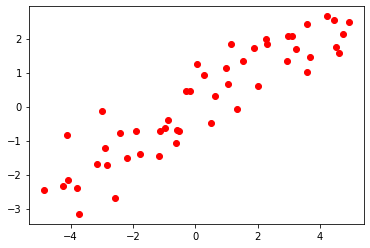

In [5]:
#导人numpy
import numpy as np
#导入画图工具
import matplotlib.pyplot as plt
#生成随机数列
rnd = np.random.RandomState(38)
x =rnd.uniform(-5,5,size=50)
#向数据中添加噪声
y_no_noise = (np.cos(6*x)+x)
X = x.reshape(-1,1)
y = (y_no_noise + rnd.normal(size=len(x)))/2
#绘制图形
plt.plot(X, y,"o",c="r")#这就直接是散点图
#显示图形
plt.show()

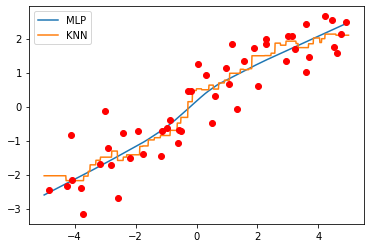

In [6]:
#导入神经网络
from sklearn.neural_network import MLPRegressor
#导人KNN
from sklearn.neighbors import KNeighborsRegressor
#生成一个等差数列
line = np.linspace(- 5,5,1000,endpoint=False).reshape(-1 , 1)
#分别用两种算法拟合数据
mlpr = MLPRegressor().fit(X, y )
knr = KNeighborsRegressor().fit(X,y)
#绘制图形
plt.plot(line,mlpr.predict(line),label= "MLP")
plt.plot(line,knr.predict(line),label= "KNN")
plt.plot(X , y,"o", c ="r" )
plt.legend (loc= "best")#把label打印出来
#显示图形
plt.show()

可以看到KNN的regression的线更加曲折一点

In [10]:
#设置箱体数为11
bins = np.linspace(-5 , 5 , 11)
#将数据进行装箱操作
target_bin = np.digitize(X,bins=bins)#Digitize 
#打印装箱数据范围
print("装箱数据范围:{}".format(bins))
#打印前十个数据的特征值
print("前十个数据点的特征值\n {}".format (X[:10]))
#找到它们所在的箱子
print("前十个数据点所在的箱子：{}".format(target_bin[:10]))

装箱数据范围:[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
前十个数据点的特征值
 [[-1.1522688 ]
 [ 3.59707847]
 [ 4.44199636]
 [ 2.02824894]
 [ 1.33634097]
 [ 1.05961282]
 [-2.99873157]
 [-1.12612112]
 [-2.41016836]
 [-4.25392719]]
前十个数据点所在的箱子：[[ 4]
 [ 9]
 [10]
 [ 8]
 [ 7]
 [ 7]
 [ 3]
 [ 4]
 [ 3]
 [ 1]]


每个箱子相当于一个范围区间吧，11的点就有10个箱子

从结果中可以看到， 第一个箱子是－ 5 到－4 之间， 第二个箱子是－ 4 到－ 3
之间，以此类推。第l 个数据点一1.1522688 所在的箱子是第4 个， 第2 个数据点3.59707847
所在的箱子是第9 个，而第3 个数据点4.44199636 所在的箱子是第10 个，以此类推。
接下来我们要做的事情，就是用新的方法来表达己经装箱的数据，所要用到的方法
就是sci.kit-learn 的独热编码OneHotEncoder 。On eHotEncoder 和pandas 的get_ dummies 功
能基本上是一样的， 但是OneHotEncoder 目前只能用于整型数值的类型变量。现在输入
代码如下：

In [12]:
#导入独热编码
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse = False)
onehot.fit(target_bin)
#使用独热编码转化数据
X_in_bin=onehot.transform(target_bin)
#打印结果
print ("装箱后的数据形态{}".format(X_in_bin.shape))
print ("装箱后的前十个数据点。{}".format( X_in_bin[:10]))

装箱后的数据形态(50, 10)
装箱后的前十个数据点。[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


one-hot encoder其实就是将整形的类型转化成独热的类型

现在可以看到，虽然数据集中样本的数量仍然是50 个，但特征数变成
了10 个。这是因为我们生成的箱子是10 个，而新的数据点的特征是用其所在的箱子号
码来表示的。例如， 第1 个数据点在第4 个箱子中，则其特征列表中第4 个数字是［，
其他数字是0 ，以此类推。
这样一来，相当于我们把原先数据集中的连续特征转化成了类别特征。现在我们再
用MLP 和配刑算法重新进行回归分析，看看结果发生了什么变化。输入代码如下：

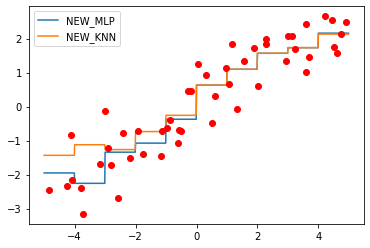

In [13]:
new_line=onehot.transform(np.digitize(line,bins=bins))#Digitize 
new_mlpr = MLPRegressor().fit(X_in_bin, y )
new_knr = KNeighborsRegressor().fit(X_in_bin,y)
#绘制图形
plt.plot(line,new_mlpr.predict(new_line),label= "NEW_MLP")#还是以原来的横坐表去画
plt.plot(line,new_knr.predict(new_line),label= "NEW_KNN")
plt.plot(X , y,"o", c ="r" )
plt.legend (loc= "best")#把label打印出来
#显示图形
plt.show()

有意思的事情发生了， MLP 模型和KNN 模型变得更相似了，尤其在
x > O 的部分， 两个模型几乎完全重合。如果和图10-5 对比的话，你会发现MLP 的回归
模型变得更复杂， 而KNN 的模型变得更简单。所以这是对样本特征进行装箱的一个好处：
它可以纠正模型过拟合或者欠拟合的问题。尤其是当针对大规模高维度的数据集使用线
性模型的时候，装箱处理可以大幅提高线性模型的预测准确率。

大规模高维度的线性模型，先装箱再onehot可以纠正过拟合或者欠拟合


这种对于样本数据进行装箱的操作对于基于决策树的算法（如随机森林、梯度上升
决策树，当然也包括决策树本身）没有太多的作用，因为这类算法本身就是不停在拆分
样本的特征数据，所以不需要再使用装箱操作。

数据升维度，有交互式的intersaction feature,还有多项式的polynominal feature,intersaction feature用的是hstack

In [15]:
#将原始数据和装箱后的数据说行堆叠
X_stack=np.hstack([X, X_in_bin])
print(X_stack.shape)

(50, 11)


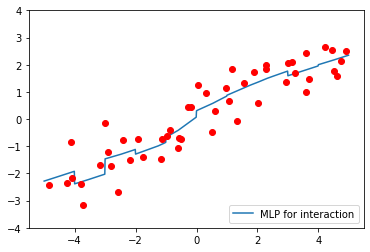

In [18]:
line_stack=np.hstack([line,new_line])
#重新训练模型
mlpr_interact=MLPRegressor().fit(X_stack, y)
#绘制图形
plt.plot(line, mlpr_interact.predict(line_stack),label= "MLP for interaction")
plt.ylim(-4 , 4)
# for vline in bins :
# plt .plot ( [vline , vline) , (-5 , 5 ] ,’ : ’, c= ’ k ’)
plt.legend(loc="lower right")
plt.plot(X,y,"o", c ="r")
#显示图形
plt.show()

之前的没加交互式的话，在箱体中是水平的，现在的话，在箱体中式倾斜的


但是，这样的操作方式让每个箱体中模型的斜率都是一样的，这还不是我们想要的
结果，我们希望达到的效果是，每个箱体中都有各自的截距和斜率。所以要换一种数据
处理的方式

In [20]:
#将原始数据和装箱后的数据说行堆叠
X_multi=np.hstack([X_in_bin,X*X_in_bin])
print(X_multi.shape)
print(X_multi[0])

(50, 20)
[ 0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        -0.        -0.
 -0.        -1.1522688 -0.        -0.        -0.        -0.
 -0.        -0.       ]


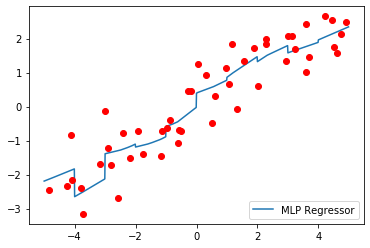

In [22]:
#重新训练模型
mlpr_multi = MLPRegressor().fit(X_multi, y)
line_multi = np.hstack([new_line, line* new_line])
#绘制图形
plt.plot (line, mlpr_multi.predict(line_multi), label ="MLP Regressor")
# for vline in bins:
# plt . plot([vl 工ne, vline], ( - 5, 5 ] ,’:’, c =’ gray ’ )
plt.plot(X, y ,"o", c="r")
plt.legend(loc="lower right")
#显示图形
plt. show()

通过这样的处理之后，大家会发现，每个箱子中模型的“截距”和“斜
率”都不一样了。而这种数据处理的目的， 主要是为了让比较容易出现欠拟合现象的模
型能有更好的表现。例如，我们曾在第4 章介绍过的线性模型，线性模型在高维数据集
中有良好的性能，但是在低维数据集中却表现一般，因此我们需要用上面的方法来进行
特征扩充，以便给数据集“升维”，从而提升线性模型的准确率。


线性模型在低维数据中表现一般，在高维数据的情况下才会表现得较好，所以如果特征很少的话就得对数据进行填充，也就是升维，那么就可以先装箱子，然后再onehot，然后再填充

In [25]:
X.shape

(50, 1)

In [27]:
#导人多项式特征工具
from sklearn.preprocessing import PolynomialFeatures
#向数据集添加多项式特征
poly= PolynomialFeatures(degree=20,include_bias=False)#degree就是多少乘方，而多少乘方的意思就是变成多少维的数据
X_poly = poly.fit_transform(X)
#打印结果
print (X_poly.shape)

(50, 20)


In [29]:
print(X[0])

[-1.1522688]


In [30]:
print(X_poly[0])#乘方扩充数据集的话，其实就是拿原始的数据成不同的次方一次往后放罢了

[ -1.1522688    1.3277234   -1.52989425   1.76284942  -2.0312764
   2.34057643  -2.6969732    3.10763809  -3.58083443   4.1260838
  -4.75435765   5.47829801  -6.3124719    7.27366446  -8.38121665
   9.65741449 -11.12793745  12.82237519 -14.77482293  17.02456756]


In [34]:
poly.get_feature_names()

['x0',
 'x0^2',
 'x0^3',
 'x0^4',
 'x0^5',
 'x0^6',
 'x0^7',
 'x0^8',
 'x0^9',
 'x0^10',
 'x0^11',
 'x0^12',
 'x0^13',
 'x0^14',
 'x0^15',
 'x0^16',
 'x0^17',
 'x0^18',
 'x0^19',
 'x0^20']

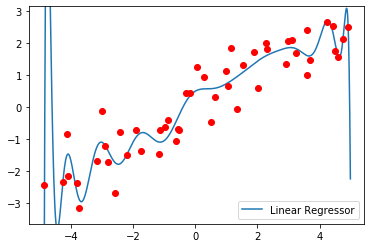

In [38]:
#导入线性回归
from sklearn.linear_model import LinearRegression
#使用处理后的数据训练线性回归模型
LNR_poly = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
#绘制图形
plt.plot(line,LNR_poly.predict(line_poly),label="Linear Regressor")
plt.xlim(np.min(X)- 0.5,np.max(X)+0.5)
plt.ylim(np.min(y)-0.5 ,np.max(y)+0.5)
plt.plot(X , y ,"o" ,c= "r")
plt.legend(loc="lower right")
#显示图形
plt . show()

可以看到，其实把原来的线性直线换成了现在这种非线性的直线，而且在一定程度上改善了欠拟合的情况


我们使用了一些对数据集特征进行扩展的方法，从而提升了线性
模型或者是神经网络模型的回归分析性能，这种方法尤其在数据特征与目标呈现非线性
关系时效果格外明显。当然，除了我们上面用到的Polynomia l Features 这种将特征值转
化为多项式的方法之外，我们还可以用类似正弦函数sin （）、对数函数log （），或是指数函
数exp （）等来进行相似的操作。